<a href="https://colab.research.google.com/github/Anastasia-Makarova/DATA_homeworks/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [211]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

from google.colab import drive

In [212]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [213]:
df = pd.read_csv('/content/drive/My Drive/DATA homeworks/03/Housing.csv')

# Intro

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [215]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [216]:
to_analize = ['price', 'area', 'bedrooms', 'bathrooms']
df = df[to_analize]
df

,price,area,bedrooms,bathrooms
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2
3,12215000,7500,4,2
4,11410000,7420,4,1
...,...,...,...,...
540,1820000,3000,2,1
541,1767150,2400,3,1
542,1750000,3620,2,1
543,1750000,2910,3,1


<Axes: >

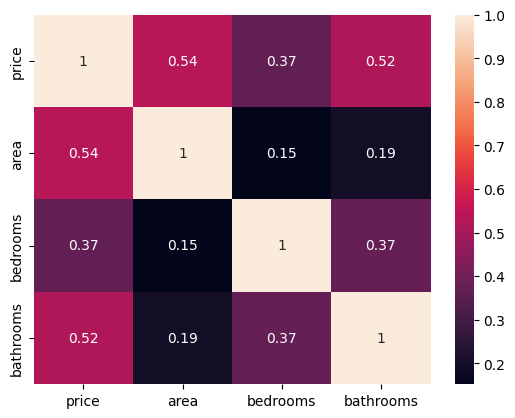

In [217]:
corr = df.corr()
sns.heatmap (corr, annot=True)

In [218]:
def normalization(data):

  mean = np.mean(data)
  value_range = np.max(data) - np.min(data)
  result = []
  for x in data:
    norm_x = (x-mean) / value_range
    result.append(norm_x)

  return result

In [219]:
df_norm = pd.DataFrame()
df_norm['price'] = normalization(df.price)
df_norm['area'] = normalization(df.area)
df_norm['bedrooms'] = normalization(df.bedrooms)
df_norm['bathrooms'] = normalization(df.bathrooms)
df_norm

,price,area,bedrooms,bathrooms
0,0.738811,0.155977,0.206972,0.237920
1,0.647902,0.261818,0.206972,0.904587
2,0.647902,0.330547,0.006972,0.237920
3,0.644872,0.161475,0.206972,0.237920
4,0.575175,0.155977,0.206972,-0.095413
...,...,...,...,...
540,-0.255128,-0.147804,-0.193028,-0.095413
541,-0.259704,-0.189041,0.006972,-0.095413
542,-0.261189,-0.105192,-0.193028,-0.095413
543,-0.261189,-0.153989,0.006972,-0.095413


In [220]:
X = df_norm[['area', 'bedrooms', 'bathrooms']].values
y = df_norm['price'].values

In [221]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13)

# напишіть функцію гіпотези лінійної регресії у векторному вигляді;

In [222]:
def h(X, w):
  return np.dot(X, w)

# створіть функцію для обчислення функції втрат у векторному вигляді;

In [223]:
def loss_function(X, y, w):
  return np.square(h(X, w) - y).sum() / (2 * len(X))


# реалізуйте один крок градієнтного спуску;

In [224]:
def gradient_step(X, y, w, learning_rate):
  m = len(y)
  grad = (X.T @ (h(X, w) - y)) / m
  w -= learning_rate * grad

  return w

In [225]:
def gradient (X, y, learning_rate, num_iter, eps):

  ones = np.ones((X.shape[0], 1)) # вертикальний вектор з "1" на довж. матриці Х

  X = np.hstack((ones, X)) #array([[ 1.  ,  0.15597654,  0.20697248,  0.23792049],...)

  w = np.zeros(X.shape[1]) # weights   array([0., 0., 0., 0.]) -> [w0, w1, w2, w3]

  loss = loss_function(X, y, w)
  # np.square(h(X, w) - y).sum() / (2 * len(X))

  loss_history = [loss]

  for _ in range(num_iter):
    w = gradient_step(X, y, w, learning_rate)

    loss = loss_function(X, y, w)
    if abs(loss - loss_history[-1]) < eps:
      loss_function.append(loss)
      break

    loss_history.append(loss)
  return w, loss_history

In [226]:
learning_rate = 0.1
num_iter = 1000
eps = 1e-10


w_gradient, loss_history = gradient(X_train, y_train, learning_rate, num_iter, eps)
print('Gradien Descent - w:', w_gradient)

Gradien Descent - w: [0.0026026  0.44920087 0.18973919 0.33849541]


# знайдіть ці ж параметри за допомогою аналітичного рішення;

In [227]:
ones = np.ones((X_train.shape[0], 1))
X_train = np.hstack((ones, X_train))
w_analytical = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train

print('Analytical solution - Optimal w:', w_analytical)

Analytical solution - Optimal w: [0.00260629 0.51343795 0.16829044 0.34592965]


# знайдіть найкращі параметри ώ для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень;

In [228]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [229]:
lr.fit(X_train, y_train)

LinearRegression()

In [260]:
c = lr.intercept_
c

0.0026062923472112993

In [261]:
m = lr.coef_
m

array([0.        , 0.51343795, 0.16829044, 0.34592965])

# порівняйте отримані результати.

In [235]:
ones = np.ones((X_test.shape[0], 1))
X_test = np.hstack((ones, X_test))

In [246]:
y_pred_gradient = h(X_test, w_gradient)
y_pred_analytical = h(X_test, w_analytical)
y_pred_LR = lr.predict(X_test)

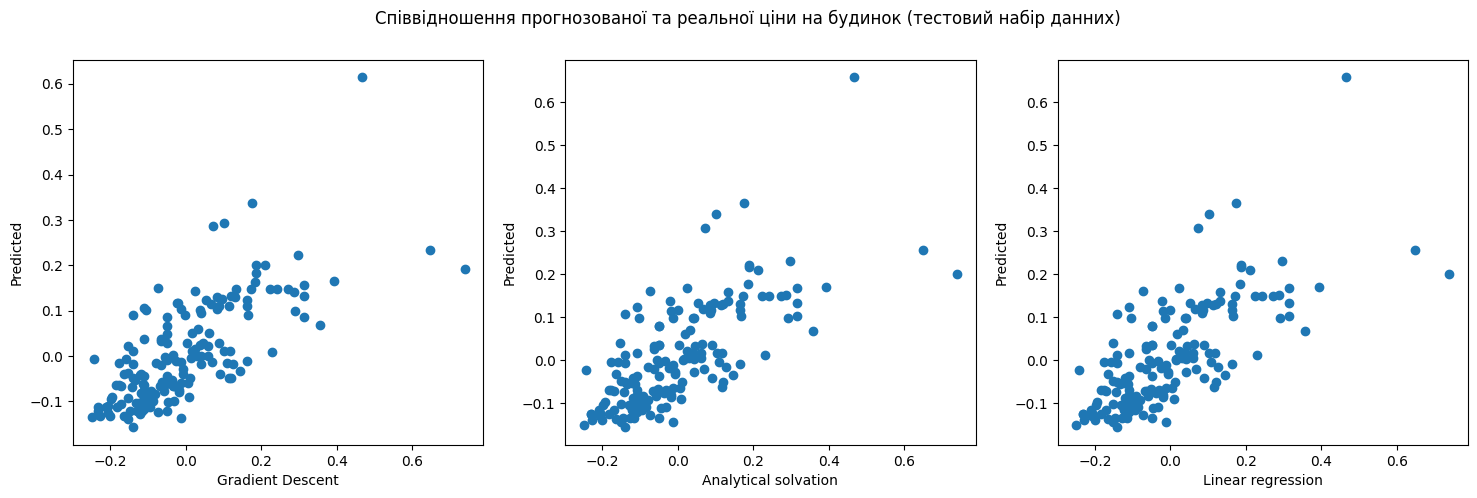

In [258]:
fig, ax = plt.subplots(1, 3, figsize = (18, 5))

a_0, b_0 = np.polyfit(y_test, y_pred_gradient, 1)
ax[0].scatter(y_test, y_pred_gradient)
ax[0].set_xlabel('Gradient Descent')
ax[0].set_ylabel('Predicted')

a_1, b_1 = np.polyfit(y_test, y_pred_analytical, 1)
ax[1].scatter(y_test, y_pred_analytical)
ax[1].set_xlabel('Analytical solvation')
ax[1].set_ylabel('Predicted')

a_2, b_2 = np.polyfit(y_test, y_pred_LR, 1)
ax[2].scatter(y_test, y_pred_LR)
ax[2].set_xlabel('Linear regression')
ax[2].set_ylabel('Predicted')



fig.suptitle('Співвідношення прогнозованої та реальної ціни на будинок (тестовий набір данних)')
plt.show()